## Case study 2: Overview

An Institution wishes to find out their student’s ability in maths, reading and
writing skills. The Institution wants to do an exploratory study to check the
following information.
1. Find out how many males and females participated in the test.
2. What do you think about the students' parental level of education?
3. Who scores the most on average for math, reading and writing based on
● Gender
● Test preparation course
4. What do you think about the scoring variation for math, reading and writing
based on
● Gender
● Test preparation course
5. The management needs your help to give bonus points to the top 25% of
students based on their maths score, so how will you help the management
to achieve this.


In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load dataset
df = pd.read_csv(r"C:\Users\zacha\OneDrive\Desktop\ictak\DSA\case studyassignment\StudentsPerformance.csv")

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


## 1.Find out how many males and females participated in the test.

In [4]:
  df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

***
518 females and 482 males participated in the test
***

## 2.What do you think about the students' parental level of education?

In [5]:
# treated high school  and some high school as different category
#(some high school interpreted as those who attanded high school but didnt complete)
df['parental level of education'].value_counts(normalize=True)*100     

some college          22.6
associate's degree    22.2
high school           19.6
some high school      17.9
bachelor's degree     11.8
master's degree        5.9
Name: parental level of education, dtype: float64

<AxesSubplot:>

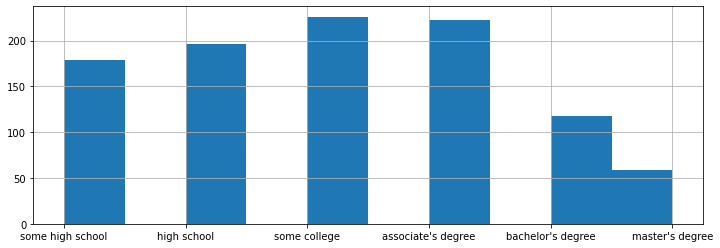

In [6]:
plt.figure(figsize = (12,4))
df['parental level of education'].hist()


*** 
*Most of the students' parental level of education falls in the following categories.*
* some college:          22.6%
* associate's degree:    22.2%
* high school:           19.6%
* some high school:      17.9%

*Very few parents have education in the following category.*
 
* bachelor's degree:     11.8%
* master's degree:        5.9%
***

## 3.Who scores the most on average for math, reading and writing based on ● Gender ● Test preparation course

In [7]:
#create a new column for average score
df['avg'] = (df['math score']+df['reading score']+df['writing score'])/3

In [8]:
top_scores = df.groupby(by = ['test preparation course','gender'])['avg'].max()

In [9]:
top_scores

test preparation course  gender
completed                female     99.666667
                         male      100.000000
none                     female    100.000000
                         male       93.666667
Name: avg, dtype: float64

In [10]:
#select only those rows where avg is in top scores.
filter = df['avg'].isin (top_scores)
df[filter].sort_values(by = ['gender','test preparation course','avg'],ascending = [True,True,False])

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg
513,female,group E,bachelor's degree,standard,completed,99,100,100,99.666667
516,female,group E,bachelor's degree,standard,none,100,100,100,100.000000
517,female,group E,associate's degree,standard,none,100,100,100,100.000000
999,male,group E,bachelor's degree,standard,completed,100,100,100,100.000000
990,male,group C,associate's degree,standard,none,97,93,91,93.666667


*** 
The above table shows the detail of top students based on gender and test preparation course.(Among female, with test prep status  none, there are 2 top scorers.)
***

## 4.What do you think about the scoring variation for math, reading and writing based on ● Gender ● Test preparation course

### Math score variation

In [11]:
scores = df.groupby(by = ['gender','test preparation course'])[['math score','reading score','writing score' ]].describe()
scores['math score']

count       mean        std   min    25%  \
gender test preparation course                                             
female completed                184.0  67.108696  14.428233  23.0  58.75   
       none                     334.0  61.320359  16.510686   0.0  52.00   
male   completed                174.0  72.988506  14.039164  39.0  63.00   
       none                     308.0  66.467532  14.335746  27.0  57.00   

                                 50%   75%    max  
gender test preparation course                     
female completed                67.0  76.0   99.0  
       none                     62.0  73.0  100.0  
male   completed                74.0  82.0  100.0  
       none                     67.0  76.0   97.0

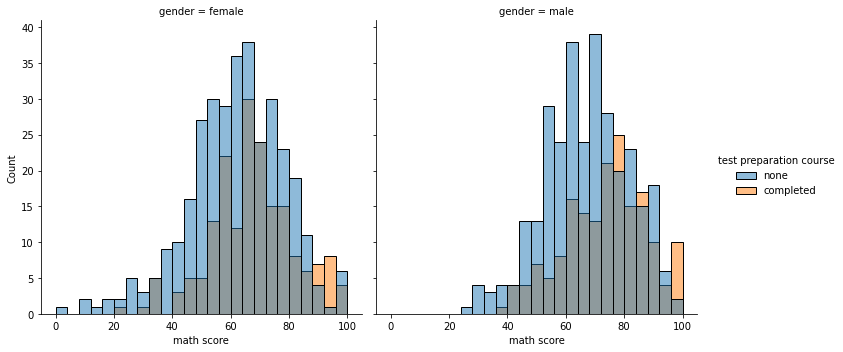

In [12]:

sns.displot(data = df, x = 'math score', col ='gender',hue = 'test preparation course')
plt.show()

***

As per the data, the math score variation is large among female, whose test preparation status is none.
***

### Reading score variation

In [13]:
scores['reading score']

count       mean        std   min   25%   50%  \
gender test preparation course                                                  
female completed                184.0  77.375000  12.695493  40.0  70.0  78.0   
       none                     334.0  69.955090  14.636981  17.0  61.0  71.0   
male   completed                174.0  70.793103  13.612420  37.0  62.0  72.0   
       none                     308.0  62.581169  13.595718  23.0  54.0  63.0   

                                 75%    max  
gender test preparation course               
female completed                86.0  100.0  
       none                     80.0  100.0  
male   completed                81.0  100.0  
       none                     73.0   96.0

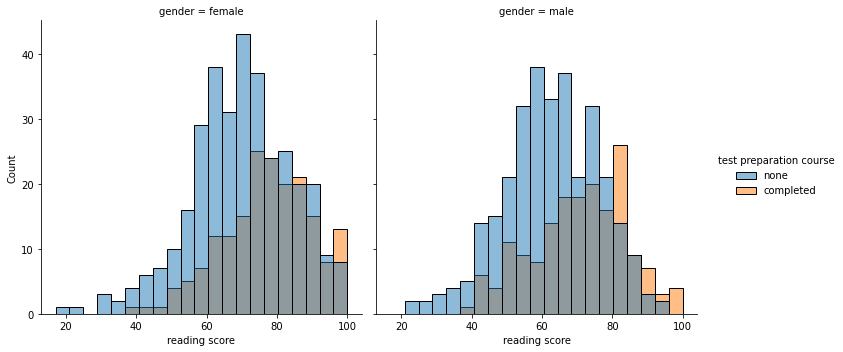

In [14]:
sns.displot(data = df, x = 'reading score', col ='gender',hue = 'test preparation course')
plt.show()

***
There is only slight variation in reading scores among gender and test preparation course status.Lowest variation is among female , with test preparation status completed.
***

### Writing score variation

In [15]:
scores['writing score']

count       mean        std   min   25%   50%  \
gender test preparation course                                                  
female completed                184.0  78.793478  12.240788  36.0  72.0  79.0   
       none                     334.0  68.982036  15.016497  10.0  60.0  70.0   
male   completed                174.0  70.339080  12.887910  38.0  62.0  71.0   
       none                     308.0  59.551948  13.468284  15.0  51.0  60.0   

                                  75%    max  
gender test preparation course                
female completed                87.25  100.0  
       none                     79.00  100.0  
male   completed                79.00  100.0  
       none                     69.00   92.0

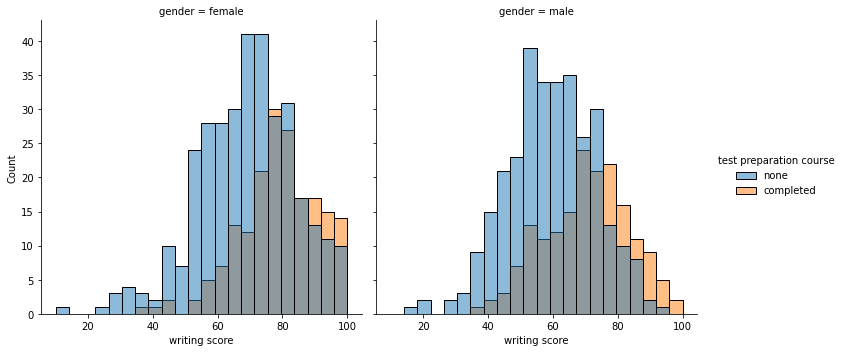

In [16]:
sns.displot(data = df, x = 'writing score', col ='gender',hue = 'test preparation course')
plt.show()

***
Writing score variation is also large among female whose test completion status is none. Among the three scores, math score has large variation.
***

## 5.The management needs your help to give bonus points to the top 25% of students based on their maths score, so how will you help the management to achieve this.

First identify top 25% of students based on math score from the data. Then provide their id to the management.

In [17]:
df.shape

(1000, 9)

In [18]:
# 25 percentage
n = df.shape[0]*.25

In [19]:
df.nlargest(int(n),'math score')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg
515,female,group E,some college,standard,none,100,92,97,96.333333
516,female,group E,bachelor's degree,standard,none,100,100,100,100.000000
517,female,group E,associate's degree,standard,none,100,100,100,100.000000
996,male,group A,some college,standard,completed,100,96,86,94.000000
997,male,group D,some college,standard,completed,100,97,99,98.666667
...,...,...,...,...,...,...,...,...,...
428,female,group D,some college,free/reduced,none,77,86,86,83.000000
429,female,group E,some high school,standard,none,77,79,80,78.666667
849,male,group A,bachelor's degree,standard,none,77,67,68,70.666667
850,male,group C,associate's degree,free/reduced,none,77,67,64,69.333333


In [20]:
bonus_id = df.nlargest(int(n),'math score').index.to_list()
print(bonus_id)

[515, 516, 517, 996, 997, 998, 999, 513, 514, 995, 512, 993, 994, 510, 511, 989, 990, 991, 992, 508, 509, 988, 507, 987, 505, 506, 982, 983, 984, 985, 986, 503, 504, 980, 981, 499, 500, 501, 502, 978, 979, 497, 498, 971, 972, 973, 974, 975, 976, 977, 495, 496, 964, 965, 966, 967, 968, 969, 970, 494, 959, 960, 961, 962, 963, 488, 489, 490, 491, 492, 493, 950, 951, 952, 953, 954, 955, 956, 957, 958, 483, 484, 485, 486, 487, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949, 481, 482, 933, 934, 935, 936, 937, 938, 473, 474, 475, 476, 477, 478, 479, 480, 927, 928, 929, 930, 931, 932, 471, 472, 918, 919, 920, 921, 922, 923, 924, 925, 926, 467, 468, 469, 470, 914, 915, 916, 917, 458, 459, 460, 461, 462, 463, 464, 465, 466, 905, 906, 907, 908, 909, 910, 911, 912, 913, 450, 451, 452, 453, 454, 455, 456, 457, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 444, 445, 446, 447, 448, 449, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890, 436, 437, 438, 439, 440, 441,

***
bonus_id contains the ids of top 25% students
***